In [ ]:
#WORKING TIME SERIES MODEL OF ICECREAM PRODUCTION 

In [1]:
#reading file
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [2]:
#loading libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing data into the dataframe
dairy_data = pd.read_csv(fileName)

In [4]:
#remaining columns to remove special characters
dairy_data.rename(columns={'Icecream.Prod': 'icecream', 'Milk.Prod': 'milk'}, inplace=True)


In [6]:
#scaling icecream
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

# Adding scaled  to data frame
dairy_data['icecream_scale'] = scale(dairy_data['icecream'])

dairy_data.head()

,Year,Month,Cotagecheese.Prod,icecream,milk,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,icecream_scale
0,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1,-1.766365
1,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8,-1.362193
2,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27,-0.249214
3,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64,-0.494993
4,1995,May,4.470,73.730,2.227,0.8967,5,25,125,0.225695


In [12]:
dairy_data.tail()

,Year,Month,Cotagecheese.Prod,icecream,milk,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,icecream_scale,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,scores,resids
2013-08-31,2013,Aug,2.169,78.382,3.400,1.6273,224,50176,11239424,0.644356,...,0,0,0,0,0,0,0,0,NaN,NaN
2013-09-30,2013,Sep,2.193,74.871,3.197,1.5519,225,50625,11390625,0.328380,...,0,0,0,0,0,0,0,1,NaN,NaN
2013-10-31,2013,Oct,2.284,70.011,3.338,1.5566,226,51076,11543176,-0.109000,...,0,0,0,0,0,0,1,0,NaN,NaN
2013-11-30,2013,Nov,1.865,61.394,3.275,1.7537,227,51529,11697083,-0.884495,...,0,0,0,0,0,1,0,0,NaN,NaN
2013-12-31,2013,Dec,2.345,53.653,3.473,1.6747,228,51984,11852352,-1.581153,...,0,0,0,0,0,0,0,0,NaN,NaN


In [7]:
#adding index
#addding date index
dairy_data.index = pd.date_range(start = '1995-01', end = '2014-01', freq = 'M')

,Year,Month,Cotagecheese.Prod,icecream,milk,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,icecream_scale
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1,-1.766365
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8,-1.362193
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27,-0.249214
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64,-0.494993
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125,0.225695
1995-06-30,1995,Jun,4.238,77.994,2.124,0.9160,6,36,216,0.609437
1995-07-31,1995,Jul,4.377,81.475,2.184,0.9160,7,49,343,0.922713
1995-08-31,1995,Aug,4.368,74.981,2.152,0.8934,8,64,512,0.338280
1995-09-30,1995,Sep,3.917,61.530,2.062,0.8934,9,81,729,-0.872255
1995-10-31,1995,Oct,4.078,60.022,2.121,0.9434,10,100,1000,-1.007969


In [9]:
## Create new features, the count of months from the start of the
## series and the square of the count of months.
dairy_data.loc[:, 'Month_Cnt'] = [float(i + 1) for i in range(len(dairy_data.icecream_scale))]
dairy_data.loc[:, 'Month_Cnt2'] = [x**2 for x in dairy_data.Month_Cnt]

## Normalize the time features
from scipy.stats import zscore
dairy_data.loc[:, ['Month_Cnt', 'Month_Cnt2']] = dairy_data.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)

## Create dummy variables for the months
years = int(len(dairy_data.icecream_scale)/12)
dairy_data.loc[:, 'Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * years
dummies = pd.get_dummies(dairy_data.loc[:, 'Month'])
dairy_data[list(dummies.columns)] = dummies
## Print the head of the data frame to look at the dummy variables.
dairy_data.head(12)

,Year,Month,Cotagecheese.Prod,icecream,milk,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,icecream_scale,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1,-1.766365,...,0,0,1,0,0,0,0,0,0,0
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8,-1.362193,...,0,1,0,0,0,0,0,0,0,0
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27,-0.249214,...,0,0,0,0,0,1,0,0,0,0
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64,-0.494993,...,0,0,0,0,0,0,0,0,0,0
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125,0.225695,...,0,0,0,0,0,0,1,0,0,0
1995-06-30,1995,Jun,4.238,77.994,2.124,0.9160,6,36,216,0.609437,...,0,0,0,0,1,0,0,0,0,0
1995-07-31,1995,Jul,4.377,81.475,2.184,0.9160,7,49,343,0.922713,...,0,0,0,1,0,0,0,0,0,0
1995-08-31,1995,Aug,4.368,74.981,2.152,0.8934,8,64,512,0.338280,...,0,0,0,0,0,0,0,0,0,0
1995-09-30,1995,Sep,3.917,61.530,2.062,0.8934,9,81,729,-0.872255,...,0,0,0,0,0,0,0,0,0,1
1995-10-31,1995,Oct,4.078,60.022,2.121,0.9434,10,100,1000,-1.007969,...,0,0,0,0,0,0,0,0,1,0


In [20]:
#fitting the model for milk production
import sklearn.linear_model as lm
X = dairy_data.loc[:'2013-12-31', ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = dairy_data.loc[:'2013-12-31', 'icecream_scale'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
dairy_data.loc[:'2013-12-31', 'scores'] = mod_fit.predict(X)
dairy_data.loc[:'2013-12-31', 'resids'] = dairy_data.loc[:'2013-12-31', 'scores'] - dairy_data.loc[:'2013-12-31', 'icecream_scale']

C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


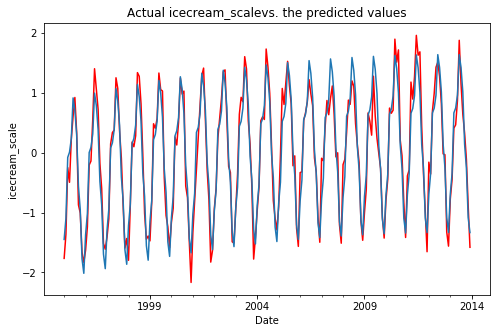

In [21]:
#plotting the fitted model
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(dairy_data, 'icecream_scale')   

In [22]:
#sperating icecream data
icecream = dairy_data.pop('icecream_scale')

In [26]:
#adding a date index
icecream.index = pd.date_range(start = '1995-01', end = '2014-1', freq = 'M')
icecream.head(20)

1995-01-31   -1.766365
1995-02-28   -1.362193
1995-03-31   -0.249214
1995-04-30   -0.494993
1995-05-31    0.225695
1995-06-30    0.609437
1995-07-31    0.922713
1995-08-31    0.338280
1995-09-30   -0.872255
1995-10-31   -1.007969
1995-11-30   -1.660440
1995-12-31   -1.833412
1996-01-31   -1.629481
1996-02-29   -1.238269
1996-03-31   -0.206376
1996-04-30   -0.139419
1996-05-31    0.554810
1996-06-30    1.403201
1996-07-31    1.060497
1996-08-31    0.723372
Freq: M, Name: icecream_scale, dtype: float64

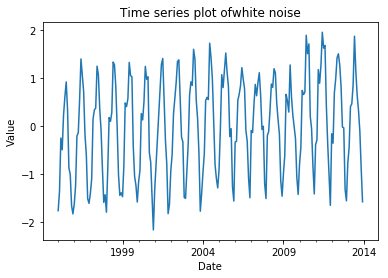

In [28]:
def plot_ts(ts, lab = ''):
    icecream.plot()
    plt.title('Time series plot of' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')

import numpy.random as nr
white = pd.Series(icecream)
plot_ts(white, 'white noise')

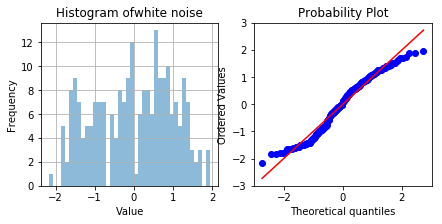

In [29]:
#plotting white noise series
def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    icecream.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(icecream, plot = ax2)
    
dist_ts(white, 'white noise') 

C:\Users\T\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


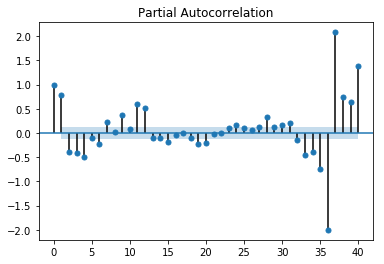

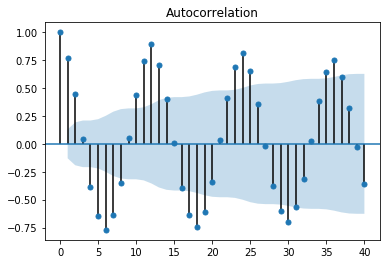

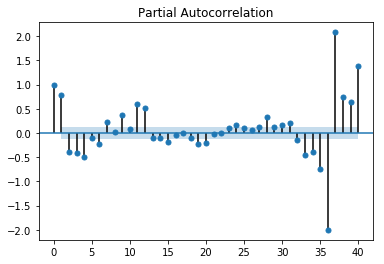

In [30]:
#plotting PACF and ACF
import statsmodels.graphics.tsaplots as splt
splt.plot_acf(white, lags = 40)
splt.plot_pacf(white, lags = 40)